# 1、数据整理

# 2、数据可视化

# 3、数据挖掘

# 4、预测



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
id           7500 non-null int64
O_TIME       7500 non-null datetime64[ns]
EPI_LAT      7500 non-null float64
EPI_LON      7500 non-null float64
EPI_DEPTH    7500 non-null int64
M            7500 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 351.6 KB
      id              O_TIME  EPI_LAT  EPI_LON  EPI_DEPTH    M
0  38577 2020-01-17 10:07:21    16.60   -95.00         20  5.3
1  38576 2020-01-17 07:09:01    42.02    84.55         15  3.0
2  38575 2020-01-17 05:32:38    36.36    77.73         81  3.0
3  38574 2020-01-16 16:32:38    41.21    83.60         16  5.6
4  38573 2020-01-15 19:34:25    25.54   103.11          8  4.2
5  38572 2020-01-15 17:19:31    39.42    73.67         16  3.3
6  38571 2020-01-15 15:55:30   -10.30   124.05         30  5.7
7  38570 2020-01-14 05:31:55    28.25    98.64          8  3.3
8  38569 2020-01-12 17:40:06    29.38   103

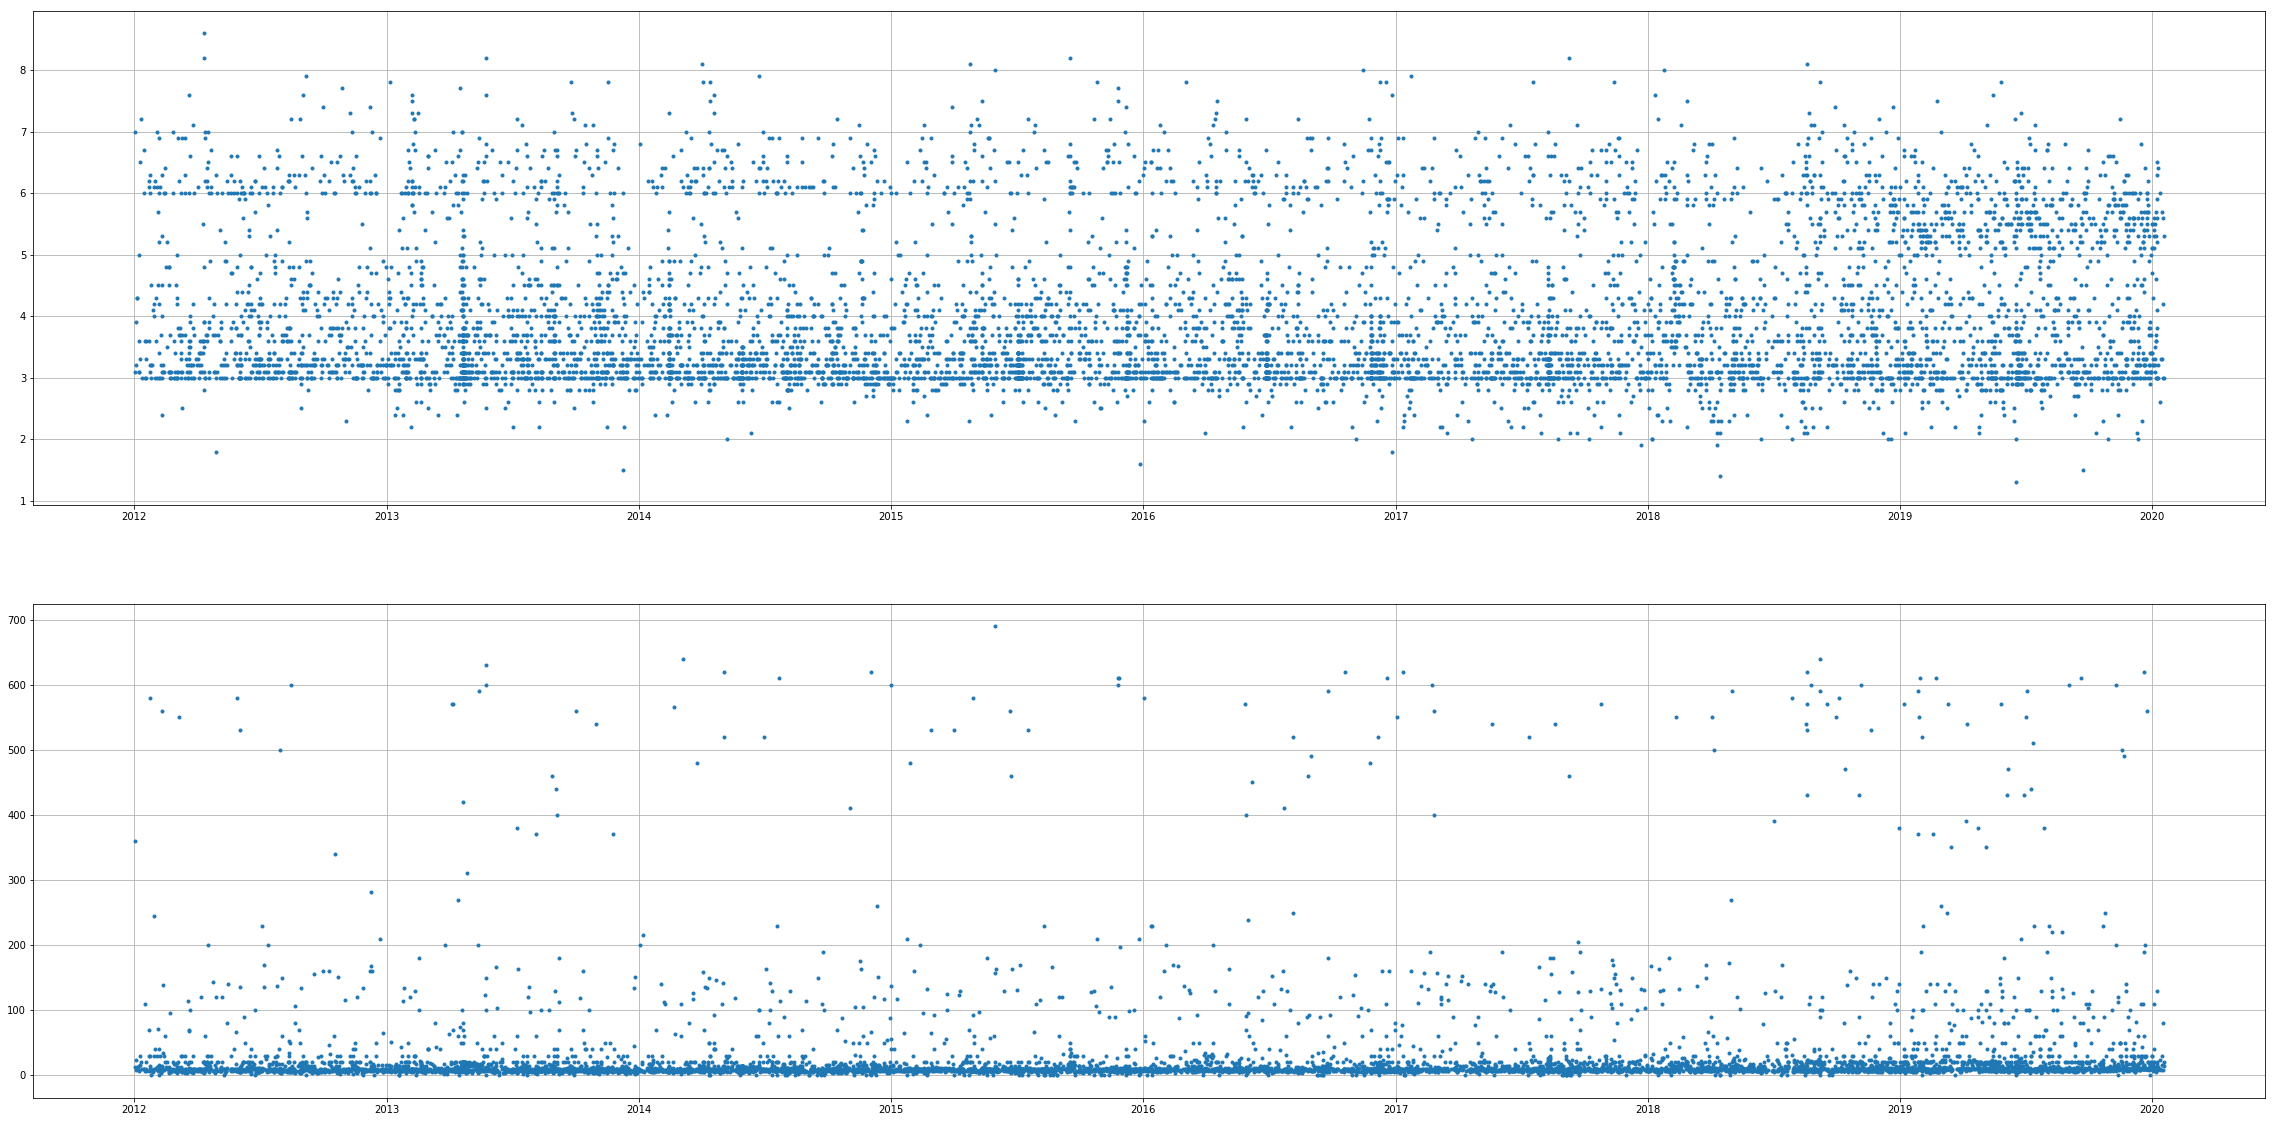

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取csv文件
earthquake = pd.read_csv('earth_quake.csv',
                         usecols=['id', 'O_TIME', 'EPI_LAT', 'EPI_LON', 'EPI_DEPTH', 'M'], # 指定列
                         parse_dates=['O_TIME']) # 转换日期格式

earthquake.info()

# 显示前10行数据
print(earthquake.head(10))
print('===')
sorted_df = earthquake.sort_values('id')
# print (sorted_df )
print(sorted_df.head(10))

fig1, axz = plt.subplots(nrows=2, figsize=(40, 20))

ax0 = axz[0]
ax0.plot( sorted_df.loc[:,'O_TIME'], sorted_df.loc[:,'M'], '.')
ax0.grid(True)

ax0 = axz[1]
ax0.plot( sorted_df.loc[:,'O_TIME'], sorted_df.loc[:,'EPI_DEPTH'], '.')
ax0.grid(True)


# ax0.title("earth quake")


plt.show()

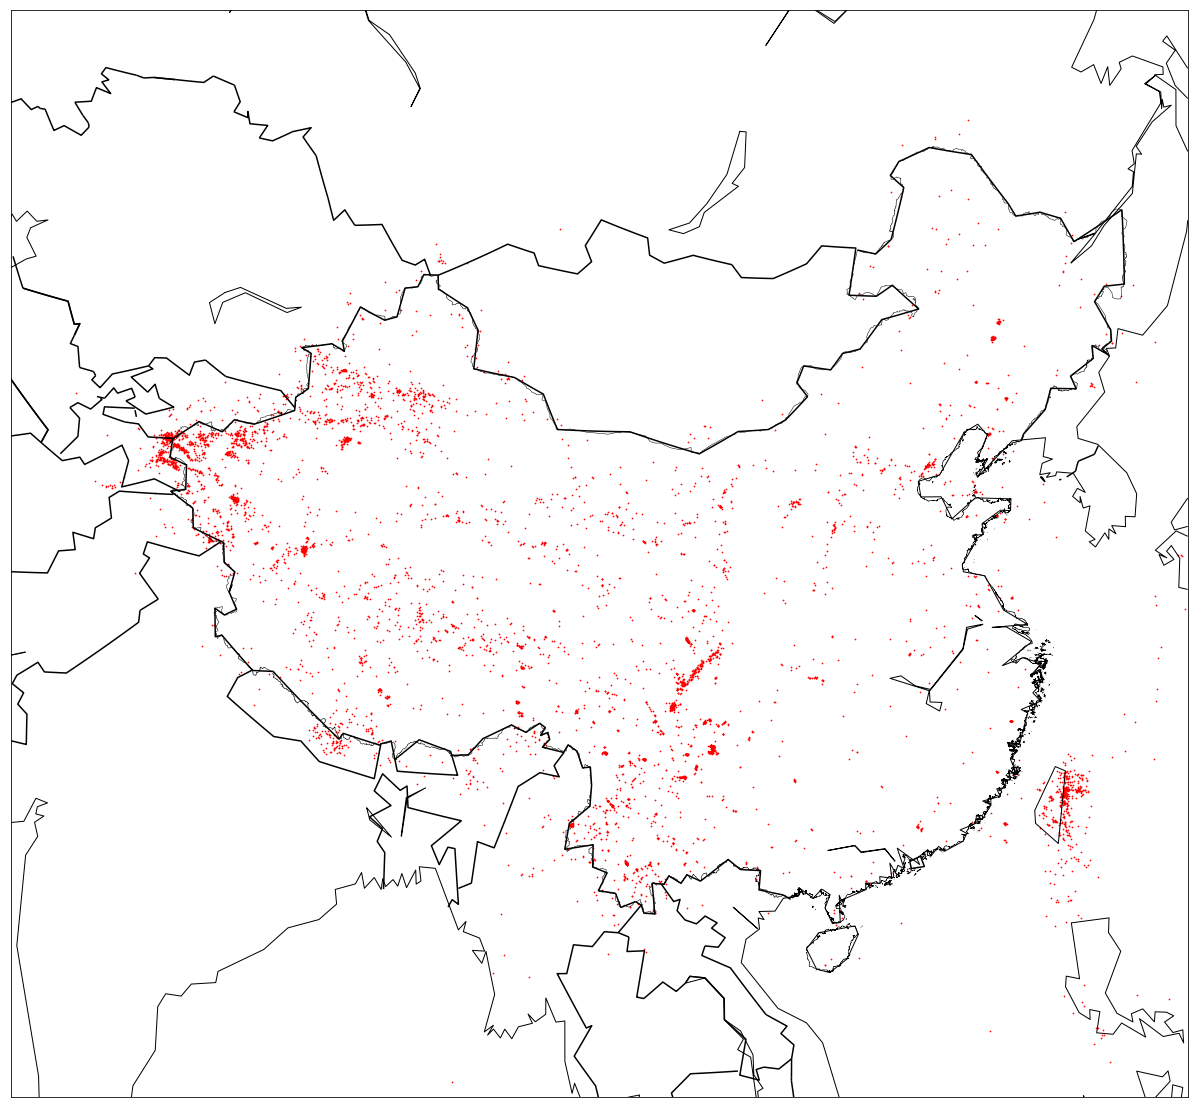

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


cut_df = sorted_df[ (sorted_df['EPI_LAT'] < 51) & (sorted_df['EPI_LAT'] >14 ) &
          (sorted_df['EPI_LON'] < 130) &(sorted_df['EPI_LON'] > 76) ]

lat = sorted_df.loc[:,'EPI_LAT']
lon = sorted_df.loc[:,'EPI_LON']

plt.figure(figsize=(40,20))
#m = Basemap(lon_0 = 150)
m = Basemap(llcrnrlon=75, llcrnrlat=10, urcrnrlon=145, urcrnrlat=55, projection='lcc', lat_1=33, lat_2=45, lon_0=100) # 兰勃特投影
#m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100) # 兰勃特投影
# m = Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=53)
m.drawcoastlines()
m.drawcountries(linewidth=1.5) 
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_0', 'states', drawbounds=True)
x, y = m(lon.values, lat.values)

m.scatter(x, y, 2, marker='.', color='r')
plt.show()
